In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


In [2]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


import tensorflow as tf

import random
from random import shuffle

import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.models import model_from_json

In [3]:
train = pd.read_csv("../input/used-cars-price-prediction/train-data.csv")
train.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
test = pd.read_csv("../input/used-cars-price-prediction/test-data.csv")
test.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
frames = [train,test]
dataset = pd.concat(frames)

In [6]:
dataset

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [7]:
dataset.dropna(axis = 0,how = "any", inplace = True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 5304 to 732
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         617 non-null    int64  
 1   Name               617 non-null    object 
 2   Location           617 non-null    object 
 3   Year               617 non-null    int64  
 4   Kilometers_Driven  617 non-null    int64  
 5   Fuel_Type          617 non-null    object 
 6   Transmission       617 non-null    object 
 7   Owner_Type         617 non-null    object 
 8   Mileage            617 non-null    object 
 9   Engine             617 non-null    object 
 10  Power              617 non-null    object 
 11  Seats              617 non-null    float64
 12  New_Price          617 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 67.5+ KB


In [10]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [11]:
X_train["Name"].value_counts()

BMW 3 Series 320d                          11
Maruti Alto K10 VXI                        11
Hyundai Grand i10 1.2 Kappa Sportz         10
Toyota Innova Crysta 2.8 ZX AT              9
Maruti Vitara Brezza ZDi Plus Dual Tone     9
                                           ..
Hyundai Elantra 1.6 SX Option AT            1
Maruti Celerio VXI Optional AMT             1
Tata Tiago 1.2 Revotron XZ WO Alloy         1
Renault Duster 110PS Diesel RxZ AWD         1
Maruti Ciaz Alpha                           1
Name: Name, Length: 269, dtype: int64

In [12]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [13]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

In [14]:
df = pd.get_dummies(dataset,
                         columns = ["Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

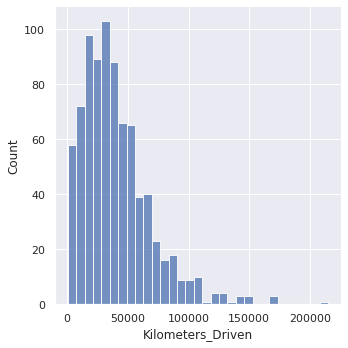

In [15]:
sns.set_theme(style="darkgrid")

sns.displot(df["Kilometers_Driven"])

<AxesSubplot:>

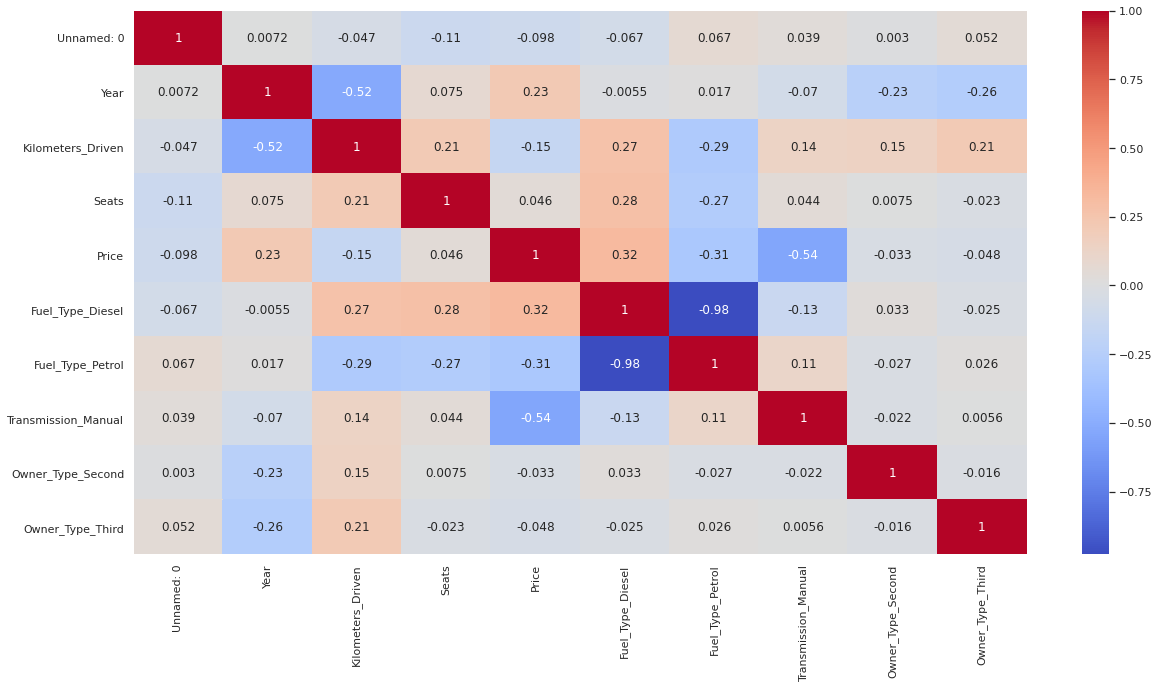

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Text(0, 0.5, 'Count of cars')

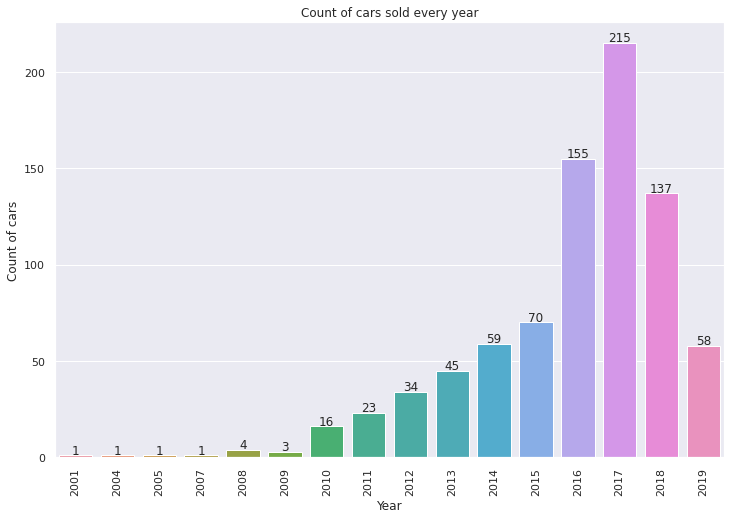

In [17]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Year', data = dataset)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars sold every year")
plt.xlabel("Year")
plt.ylabel("Count of cars")

Text(0, 0.5, 'Count of cars')

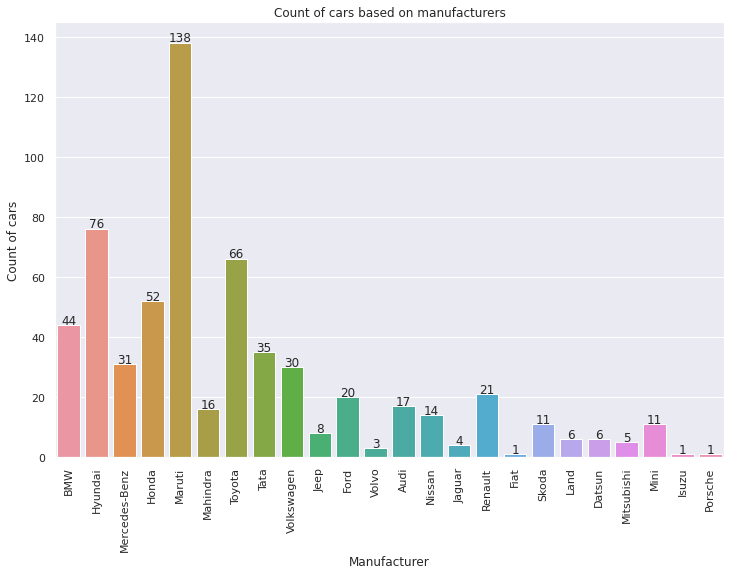

In [18]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

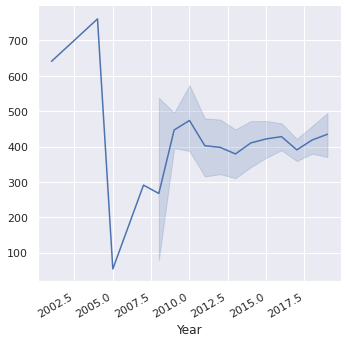

In [19]:
g = sns.relplot(x="Year", y=[num for num in range(823)], kind="line", data=df)
g.fig.autofmt_xdate()

In [20]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

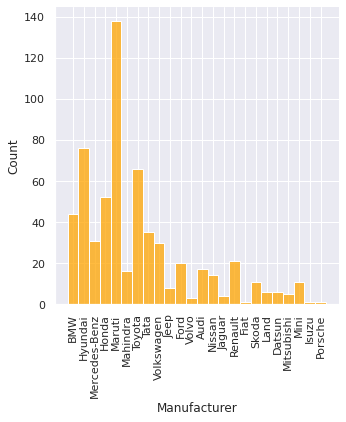

In [21]:
sns.color_palette("RdBu")
plot = sns.displot(X_train["Manufacturer"], color = "orange")
plot.set_xticklabels(rotation=90)

In [22]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

In [23]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

In [24]:
X_train["Kilometers_Driven"]

5304     21000
1313    121097
4778     47140
4907     29000
4826     23876
         ...  
456      12923
750      18955
2008     67000
3127     35981
732      55818
Name: Kilometers_Driven, Length: 617, dtype: int64

In [25]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')


In [26]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


In [27]:
X_train["Mileage"]

5304    21.76
1313    24.00
4778    13.50
4907    17.40
4826    24.07
        ...  
456     25.10
750     18.00
2008    13.68
3127    24.30
732     17.40
Name: Mileage, Length: 617, dtype: float64

In [28]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [29]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [30]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

In [31]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

<AxesSubplot:>

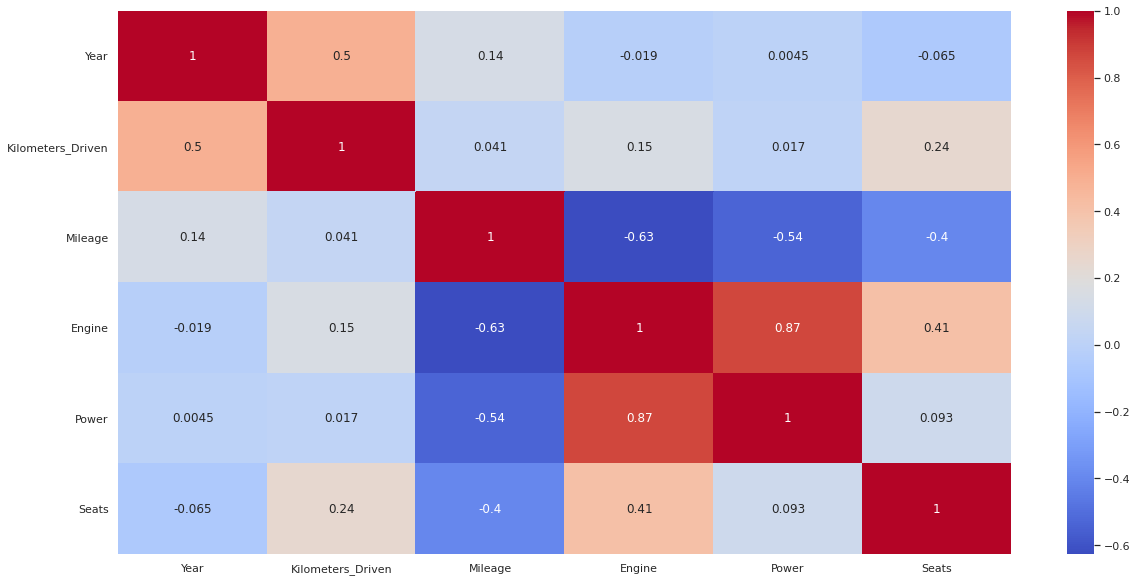

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')

In [33]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [34]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [35]:
X_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_BMW,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Ford,...,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
5304,4,21000,21.76,1995,190.00,5.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1313,13,121097,24.00,1396,88.76,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4778,10,47140,13.50,2925,281.61,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4907,4,29000,17.40,1497,117.30,5.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4826,6,23876,24.07,998,67.10,5.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,3,12923,25.10,1248,88.50,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
750,6,18955,18.00,1497,117.30,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008,4,67000,13.68,2393,147.80,7.0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3127,4,35981,24.30,1248,88.50,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [36]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [37]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [38]:
print(y_train)
X_train_sum = np.sum(X_train)
X_train_has_nan = np.isnan(X_train_sum)
print(X_train_has_nan)

5304    35.00
1313     1.90
4778    30.00
4907    10.00
4826     3.46
        ...  
456      8.92
750     10.65
2008    16.50
3127     9.51
732      5.70
Name: Price, Length: 617, dtype: float64
False


In [39]:
Y_TEST = pd.Series.to_numpy(y_test)

In [40]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_linear_pred = linearRegression.predict(X_test)
print(r2_score(y_test, y_linear_pred))

print("Printing the comparision : ")
np.set_printoptions(precision=3)
print(np.concatenate((y_linear_pred.reshape(len(y_linear_pred),1), Y_TEST.reshape(len(Y_TEST),1)),1))

0.8467659057258191
Printing the comparision : 
[[ 11.014  11.5  ]
 [  1.548   5.5  ]
 [ 31.883  24.5  ]
 [ 15.411  12.75 ]
 [  3.857   4.3  ]
 [  6.171   5.92 ]
 [  1.922   4.   ]
 [ 25.821  24.82 ]
 [  6.572   3.75 ]
 [  2.05    4.5  ]
 [  1.488   3.2  ]
 [ 19.522  17.02 ]
 [ 21.3    23.91 ]
 [  8.288   7.5  ]
 [ 25.432  29.99 ]
 [ 10.768   8.39 ]
 [ 26.604  19.64 ]
 [ -1.763   3.1  ]
 [  4.655   3.75 ]
 [ 18.875  21.69 ]
 [  9.551  10.   ]
 [  3.06    3.94 ]
 [  4.643   3.5  ]
 [  2.387   6.2  ]
 [ 26.57   30.85 ]
 [ 10.753  11.99 ]
 [ 10.024   4.68 ]
 [  6.028   7.27 ]
 [ 18.441  13.95 ]
 [ 21.426  19.75 ]
 [  3.465   7.25 ]
 [ 30.102  22.   ]
 [  5.167   3.72 ]
 [  6.6     5.39 ]
 [  2.494   2.9  ]
 [  2.809   4.95 ]
 [  5.224   6.9  ]
 [ 24.513  25.5  ]
 [ 23.881  19.97 ]
 [ 12.166  17.75 ]
 [  0.198   2.6  ]
 [ 10.818  10.9  ]
 [ 26.49   23.5  ]
 [  8.213   6.67 ]
 [ 12.875   9.18 ]
 [  7.851   9.62 ]
 [ 43.453  45.   ]
 [  2.31    2.1  ]
 [ 65.852  70.99 ]
 [ 39.666  24.46 ]
 [ 

In [41]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_ref_pred = rf.predict(X_test)
print("accuracy : ", r2_score(y_test, y_ref_pred))

print("Printing the comparision : ")
np.set_printoptions(precision=2)
print(np.concatenate((y_ref_pred.reshape(len(y_ref_pred),1), Y_TEST.reshape(len(Y_TEST),1)),1))

accuracy :  0.8504938545262362
Printing the comparision : 
[[ 10.58  11.5 ]
 [  3.82   5.5 ]
 [ 24.58  24.5 ]
 [ 14.92  12.75]
 [  4.52   4.3 ]
 [  5.57   5.92]
 [  6.01   4.  ]
 [ 21.85  24.82]
 [  4.18   3.75]
 [  3.93   4.5 ]
 [  4.18   3.2 ]
 [ 19.66  17.02]
 [ 21.67  23.91]
 [  6.69   7.5 ]
 [ 34.65  29.99]
 [ 10.04   8.39]
 [ 20.07  19.64]
 [  4.09   3.1 ]
 [  5.14   3.75]
 [ 20.47  21.69]
 [  9.22  10.  ]
 [  3.66   3.94]
 [  3.6    3.5 ]
 [  4.     6.2 ]
 [ 31.74  30.85]
 [ 14.04  11.99]
 [  5.53   4.68]
 [  6.52   7.27]
 [ 11.97  13.95]
 [ 16.83  19.75]
 [  6.57   7.25]
 [ 26.1   22.  ]
 [  3.7    3.72]
 [  5.62   5.39]
 [  3.03   2.9 ]
 [  5.3    4.95]
 [  6.1    6.9 ]
 [ 25.2   25.5 ]
 [ 19.39  19.97]
 [ 22.55  17.75]
 [  2.93   2.6 ]
 [ 10.54  10.9 ]
 [ 27.44  23.5 ]
 [  5.96   6.67]
 [  8.96   9.18]
 [  8.6    9.62]
 [ 43.22  45.  ]
 [  3.27   2.1 ]
 [ 56.67  70.99]
 [ 27.94  24.46]
 [  9.54   9.5 ]
 [ 19.95  17.55]
 [  9.31   9.  ]
 [ 29.52  39.84]
 [  8.45   9.25]
 [  5.

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

reg_test = regressor.predict(X_test)

r2_score(y_test, reg_test)

0.8137074728907362

In [43]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'linear')
svr_regressor.fit(X_train, y_train)

svr_regressor_pred = svr_regressor.predict(X_test)

r2_score(y_test, svr_regressor_pred)

0.8574725136740168

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
tree_reg = ExtraTreesRegressor()
tree_reg.fit(X_train, y_train)

tree_reg_pred = tree_reg.predict(X_test)

r2_score(y_test, tree_reg_pred)

0.8078122030992902

In [45]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 7, min_samples_split = 7,
          learning_rate = 0.1, loss = 'ls')
clf.fit(X_train, y_train)

clf_pred=clf.predict(X_test)

r2_score(y_test, clf_pred)

0.9374776969505214

In [46]:
sum=0
ct=0
per=0
diff=[]
for i in range(len(reg_test)):
    sum=abs(reg_test[i]-Y_TEST[i])
    diff.append(sum)
    if(sum<=1.0):
        ct=ct+1
per=(ct/len(reg_test))
print(per)

0.47572815533980584


In [47]:
df_analysis = pd.DataFrame(list(zip(reg_test,Y_TEST ,diff)), 
               columns =['predicted', 'actual','difference']) 
df_analysis

,predicted,actual,difference
0,11.25,11.50,0.25
1,3.67,5.50,1.83
2,17.85,24.50,6.65
3,12.49,12.75,0.26
4,3.60,4.30,0.70
...,...,...,...
201,8.40,8.20,0.20
202,7.70,9.25,1.55
203,11.44,11.86,0.42
204,6.98,3.90,3.08


In [48]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=24, activation='relu'))

ann.add(tf.keras.layers.Dense(units=24, activation='relu'))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))


ann.add(tf.keras.layers.Dense(units=1))


ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = ann.fit(X_train, y_train, batch_size = 32, epochs = 1500)

Epoch 1/1500
20/20 [==============================] - 1s 2ms/step - loss: 379.7530
Epoch 2/1500
20/20 [==============================] - 0s 1ms/step - loss: 335.1085
Epoch 3/1500
20/20 [==============================] - 0s 1ms/step - loss: 165.9713
Epoch 4/1500
20/20 [==============================] - 0s 1ms/step - loss: 108.4875
Epoch 5/1500
20/20 [==============================] - 0s 1ms/step - loss: 78.0333
Epoch 6/1500
20/20 [==============================] - 0s 1ms/step - loss: 53.9748
Epoch 7/1500
20/20 [==============================] - 0s 1ms/step - loss: 67.2444
Epoch 8/1500
20/20 [==============================] - 0s 1ms/step - loss: 79.5393
Epoch 9/1500
20/20 [==============================] - 0s 2ms/step - loss: 40.1473
Epoch 10/1500
20/20 [==============================] - 0s 2ms/step - loss: 58.2108
Epoch 11/1500
20/20 [==============================] - 0s 2ms/step - loss: 36.6238
Epoch 12/1500
20/20 [==============================] - 0s 1ms/step - loss: 65.8413
Epoch 13/

20/20 [==============================] - 0s 1ms/step - loss: 4.3707
Epoch 101/1500
20/20 [==============================] - 0s 1ms/step - loss: 4.1210
Epoch 102/1500
20/20 [==============================] - 0s 1ms/step - loss: 3.8416
Epoch 103/1500
20/20 [==============================] - 0s 1ms/step - loss: 3.4334
Epoch 104/1500
20/20 [==============================] - 0s 2ms/step - loss: 4.4309
Epoch 105/1500
20/20 [==============================] - 0s 1ms/step - loss: 6.5301
Epoch 106/1500
20/20 [==============================] - 0s 2ms/step - loss: 5.8065
Epoch 107/1500
20/20 [==============================] - 0s 1ms/step - loss: 5.8494
Epoch 108/1500
20/20 [==============================] - 0s 1ms/step - loss: 5.8663
Epoch 109/1500
20/20 [==============================] - 0s 1ms/step - loss: 3.8465
Epoch 110/1500
20/20 [==============================] - 0s 1ms/step - loss: 3.5017
Epoch 111/1500
20/20 [==============================] - 0s 1ms/step - loss: 5.3694
Epoch 112/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 2.6211
Epoch 199/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.9221
Epoch 200/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.6009
Epoch 201/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.8722
Epoch 202/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.7936
Epoch 203/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.8639
Epoch 204/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.2095
Epoch 205/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.3177
Epoch 206/1500
20/20 [==============================] - 0s 1ms/step - loss: 3.0576
Epoch 207/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.4110
Epoch 208/1500
20/20 [==============================] - 0s 2ms/step - loss: 4.3969
Epoch 209/1500
20/20 [==============================] - 0s 2ms/step - loss: 4.2665
Epoch 210/1500
20/2

20/20 [==============================] - 0s 2ms/step - loss: 2.2959
Epoch 297/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.9007
Epoch 298/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.3252
Epoch 299/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.0581
Epoch 300/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.2681
Epoch 301/1500
20/20 [==============================] - 0s 2ms/step - loss: 3.2145
Epoch 302/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.5262
Epoch 303/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.4154
Epoch 304/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.5730
Epoch 305/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.6590
Epoch 306/1500
20/20 [==============================] - 0s 2ms/step - loss: 2.0123
Epoch 307/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.8982
Epoch 308/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 2.1962
Epoch 395/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.5475
Epoch 396/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.9561
Epoch 397/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.2919
Epoch 398/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.2541
Epoch 399/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.3961
Epoch 400/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.4740
Epoch 401/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.3451
Epoch 402/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.5283
Epoch 403/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.4136
Epoch 404/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.2227
Epoch 405/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.5884
Epoch 406/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.8988
Epoch 493/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.2676
Epoch 494/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.3287
Epoch 495/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.8533
Epoch 496/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.0549
Epoch 497/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7902
Epoch 498/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.1454
Epoch 499/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9746
Epoch 500/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.1947
Epoch 501/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7270
Epoch 502/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7591
Epoch 503/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9860
Epoch 504/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 1.9173
Epoch 591/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.4873
Epoch 592/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.2300
Epoch 593/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.0447
Epoch 594/1500
20/20 [==============================] - 0s 2ms/step - loss: 0.8705
Epoch 595/1500
20/20 [==============================] - 0s 2ms/step - loss: 0.7603
Epoch 596/1500
20/20 [==============================] - 0s 2ms/step - loss: 0.6998
Epoch 597/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9688
Epoch 598/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.8239
Epoch 599/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.0896
Epoch 600/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9616
Epoch 601/1500
20/20 [==============================] - 0s 2ms/step - loss: 0.7292
Epoch 602/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.6649
Epoch 689/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6700
Epoch 690/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7446
Epoch 691/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.1236
Epoch 692/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.1030
Epoch 693/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9175
Epoch 694/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9089
Epoch 695/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9307
Epoch 696/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5854
Epoch 697/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6174
Epoch 698/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6111
Epoch 699/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7354
Epoch 700/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.4287
Epoch 787/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4080
Epoch 788/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4904
Epoch 789/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5147
Epoch 790/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4605
Epoch 791/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4511
Epoch 792/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4890
Epoch 793/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4387
Epoch 794/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4856
Epoch 795/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5824
Epoch 796/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5141
Epoch 797/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5119
Epoch 798/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.5928
Epoch 885/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3769
Epoch 886/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7552
Epoch 887/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4596
Epoch 888/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4052
Epoch 889/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4259
Epoch 890/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4068
Epoch 891/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3449
Epoch 892/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3599
Epoch 893/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3504
Epoch 894/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4980
Epoch 895/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4397
Epoch 896/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.4346
Epoch 983/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3184
Epoch 984/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3226
Epoch 985/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.2583
Epoch 986/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3145
Epoch 987/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3028
Epoch 988/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3493
Epoch 989/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4640
Epoch 990/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3371
Epoch 991/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3329
Epoch 992/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3144
Epoch 993/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3074
Epoch 994/1500
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.6946
Epoch 1080/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.1693
Epoch 1081/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.5607
Epoch 1082/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.5645
Epoch 1083/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.1949
Epoch 1084/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5614
Epoch 1085/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7777
Epoch 1086/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.3868
Epoch 1087/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7682
Epoch 1088/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.8276
Epoch 1089/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6029
Epoch 1090/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5485
Epoch 10

20/20 [==============================] - 0s 1ms/step - loss: 0.9782
Epoch 1177/1500
20/20 [==============================] - 0s 2ms/step - loss: 1.0912
Epoch 1178/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9409
Epoch 1179/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7805
Epoch 1180/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4231
Epoch 1181/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.2887
Epoch 1182/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4683
Epoch 1183/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6528
Epoch 1184/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7590
Epoch 1185/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5416
Epoch 1186/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7570
Epoch 1187/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.4804
Epoch 11

20/20 [==============================] - 0s 2ms/step - loss: 1.3018
Epoch 1274/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.1362
Epoch 1275/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.8773
Epoch 1276/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.7234
Epoch 1277/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.2025
Epoch 1278/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.3872
Epoch 1279/1500
20/20 [==============================] - 0s 1ms/step - loss: 2.7811
Epoch 1280/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.2256
Epoch 1281/1500
20/20 [==============================] - 0s 1ms/step - loss: 1.1479
Epoch 1282/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6236
Epoch 1283/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7050
Epoch 1284/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.8567
Epoch 12

20/20 [==============================] - 0s 1ms/step - loss: 0.4446
Epoch 1371/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6811
Epoch 1372/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5351
Epoch 1373/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4598
Epoch 1374/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4809
Epoch 1375/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.5501
Epoch 1376/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.9200
Epoch 1377/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.8693
Epoch 1378/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.7717
Epoch 1379/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.6148
Epoch 1380/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3964
Epoch 1381/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3199
Epoch 13

20/20 [==============================] - 0s 1ms/step - loss: 0.2775
Epoch 1468/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.2788
Epoch 1469/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3735
Epoch 1470/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3872
Epoch 1471/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.3857
Epoch 1472/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.2711
Epoch 1473/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4106
Epoch 1474/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.2909
Epoch 1475/1500
20/20 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 1476/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4715
Epoch 1477/1500
20/20 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 1478/1500
20/20 [==============================] - 0s 2ms/step - loss: 0.4946
Epoch 14

In [49]:
y_ann_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_ann_pred.reshape(len(y_ann_pred),1), Y_TEST.reshape(len(Y_TEST),1)),1))

[[ 11.65  11.5 ]
 [  4.58   5.5 ]
 [ 23.04  24.5 ]
 [ 14.61  12.75]
 [  7.13   4.3 ]
 [  6.98   5.92]
 [  4.38   4.  ]
 [ 21.36  24.82]
 [  4.2    3.75]
 [  4.48   4.5 ]
 [  3.14   3.2 ]
 [ 18.06  17.02]
 [ 20.05  23.91]
 [  5.36   7.5 ]
 [ 32.94  29.99]
 [ 10.68   8.39]
 [ 19.8   19.64]
 [  3.79   3.1 ]
 [  4.8    3.75]
 [ 18.87  21.69]
 [  8.88  10.  ]
 [  3.46   3.94]
 [  3.84   3.5 ]
 [  3.52   6.2 ]
 [ 34.63  30.85]
 [ 13.36  11.99]
 [  6.83   4.68]
 [  5.68   7.27]
 [ 12.79  13.95]
 [ 15.55  19.75]
 [  4.93   7.25]
 [ 20.34  22.  ]
 [  6.14   3.72]
 [  4.31   5.39]
 [  2.69   2.9 ]
 [  5.06   4.95]
 [  5.26   6.9 ]
 [ 29.7   25.5 ]
 [ 20.78  19.97]
 [ 15.47  17.75]
 [  4.26   2.6 ]
 [ 10.91  10.9 ]
 [ 26.12  23.5 ]
 [  6.12   6.67]
 [  9.99   9.18]
 [  5.41   9.62]
 [ 45.92  45.  ]
 [  3.26   2.1 ]
 [ 70.78  70.99]
 [ 23.28  24.46]
 [  8.61   9.5 ]
 [ 17.9   17.55]
 [  9.26   9.  ]
 [ 40.73  39.84]
 [  9.02   9.25]
 [  5.42   7.56]
 [ 22.43  26.5 ]
 [  6.33  10.5 ]
 [  3.73   5.1

In [50]:
r2_score(y_test,y_ann_pred)

0.7204913362674403

In [51]:
df_analysis1 = pd.DataFrame(list(zip(y_ann_pred,Y_TEST ,diff)), 
               columns =['predicted', 'actual','difference']) 

In [52]:
df_analysis1

,predicted,actual,difference
0,[11.646394],11.50,0.25
1,[4.581402],5.50,1.83
2,[23.041958],24.50,6.65
3,[14.6131115],12.75,0.26
4,[7.128007],4.30,0.70
...,...,...,...
201,[6.6658645],8.20,0.20
202,[9.553047],9.25,1.55
203,[11.832493],11.86,0.42
204,[5.8216076],3.90,3.08


In [53]:
loss = history.history['loss']
loss

[385.79931640625,
 256.2820739746094,
 150.08255004882812,
 106.16941833496094,
 84.0047607421875,
 69.80062103271484,
 62.99480056762695,
 56.11441421508789,
 49.64533615112305,
 42.145565032958984,
 39.18607711791992,
 37.608585357666016,
 33.84135818481445,
 37.2928466796875,
 33.26172637939453,
 34.35386276245117,
 30.444026947021484,
 27.654747009277344,
 27.163860321044922,
 24.84245491027832,
 23.47010040283203,
 22.510114669799805,
 21.582965850830078,
 19.866241455078125,
 21.00800323486328,
 18.95474624633789,
 20.752174377441406,
 19.839101791381836,
 17.330930709838867,
 17.798622131347656,
 14.849721908569336,
 15.724266052246094,
 14.456124305725098,
 16.379423141479492,
 13.45843505859375,
 13.685738563537598,
 12.837827682495117,
 12.841493606567383,
 12.511326789855957,
 13.024893760681152,
 11.383870124816895,
 9.8799467086792,
 10.972378730773926,
 11.006376266479492,
 10.0139741897583,
 10.54417610168457,
 9.857744216918945,
 9.358107566833496,
 10.1569185256958,
 8

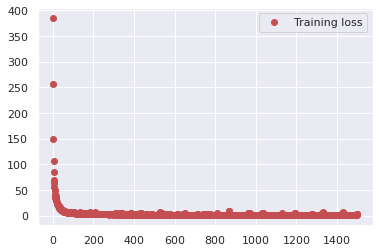

In [54]:
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

In [55]:
# serialize model to JSON
model_json = ann.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Saved Json model")

Saved Json model


In [56]:
# serialize weights to HDF5
ann.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [57]:
from keras.models import model_from_yaml
# serialize model to YAML
model_yaml = ann.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
print("Saved Yaml Model")

Saved Yaml Model
